# Probabilities, Gaussians, and Bayes' Theorem

## Introduction

The last chapter ended by discussing some of the drawbacks of the Discrete Bayesian filter. For many tracking and filtering problems our desire is to have a filter that is *unimodal* and *continuous*. That is, we want to model our system using floating point math (continuous) and to have only one belief represented (unimodal). For example, we want to say an aircraft is at (12.34, -95.54, 2389.5) where that is latitude, longitude, and altitude. We do not want our filter to tell us "it might be at (1.65, -78.01, 2100.45) or it might be at (34.36, -98.23, 2543.79)." That doesn't match our physical intuition of how the world works, and as we discussed, it can be prohibitively expensive to compute the multimodal case. And, of course, multiple position estimates makes navigating impossible.

We desire a unimodal, continuous way to represent probabilities that models how the real world works, and that is computationally efficient to calculate. Gaussian distributions provide all of these features.

## Mean, Variance, and Standard Deviations

Most of you will have had exposure to statistics, but allow me to cover this material anyway. I ask that you read the material even if you are sure you know it well. I ask for two reasons. First, I want to be sure that we are using terms in the same way. Second, I strive to form an intuitive understanding of statistics that will serve you well in later chapters. It's easy to go through a stats course and only remember the formulas and calculations, and perhaps be fuzzy on the implications of what you have learned.

### Random Variables

Each time you roll a die the *outcome* will be between 1 and 6. If we rolled a fair die a million times we'd expect to get a one 1/6 of the time. Thus we say the *probability*, or *odds* of the outcome 1 is 1/6. Likewise, if I asked you the chance of 1 being the result of the next roll you'd reply 1/6.  

This combination of values and associated probabilities is called a [*random variable*](https://en.wikipedia.org/wiki/Random_variable). Here *random* does not mean the process is nondeterministic, only that we lack information about the outcome. The result of a die toss is deterministic, but we lack enough information to compute the result. We don't know what will happen, except probabilistically.

While we are defining terms, the range of values is called the [*sample space*](https://en.wikipedia.org/wiki/Sample_space). For a die the sample space is {1, 2, 3, 4, 5, 6}. For a coin the sample space is {H, T}. *Space* is a mathematical term which means a set with structure. The sample space for the die is a subset of the natural numbers in the range of 1 to 6.

Another example of a random variable is the heights of students in a university. Here the sample space is a range of values in the real numbers between two limits defined by biology.

Random variables such as coin tosses and die rolls are *discrete random variables*. This means their sample space is represented by either a finite number of values or a countably infinite number of values such as the natural numbers. Heights of humans are called *continuous random variables* since they can take on any real value between two limits.

Do not confuse the *measurement* of the random variable with the actual value. If we can only measure the height of a person to 0.1 meters we would only record values from 0.1, 0.2, 0.3...2.7, yielding 27 discrete choices. Nonetheless a person's height can vary between any arbitrary real value between those ranges, and so height is a continuous random variable. 

In statistics capital letters are used for random variables, usually from the latter half of the alphabet. So, we might say that $X$ is the random variable representing the die toss, or $Y$ are the heights of the students in the freshmen poetry class. Later chapters use linear algebra to solve these problems, and so there we will follow the convention of using  lower case for vectors, and upper case for matrices. Unfortunately these conventions clash, and you will have to determine which an author is using from context. I always use bold symbols for vectors and matrices, which helps distinguish between the two.

## Probability Distribution


The [*probability distribution*](https://en.wikipedia.org/wiki/Probability_distribution) gives the probability for the random variable to take any value in a sample space. For example, for a fair six sided die we might say:

|Value|Probability|
|-----|-----------|
|1|1/6|
|2|1/6|
|3|1/6|
|4|1/6|
|5|1/6|
|6|1/6|

We denote this distribution with a lower case p: $p(x)$. Using ordinary function notation, we would write:

$$P(X{=}4) = p(4) = \frac{1}{6}$$

This states that the probability of the die landing on 4 is $\frac{1}{6}$. $P(X{=}x_k)$ is notation for "the probability of $X$ being $x_k$". Note the subtle notational difference. The capital $P$ denotes the probability of a single event, and the lower case $p$ is the probability distribution function. This can lead you astray if you are not observent. Some texts use $Pr$ instead of $P$ to ameliorate this. 

Another example is a fair coin. It has the sample space {H, T}. The coin is fair, so the probability for heads (H) is 50%, and the probability for tails (T) is 50%. We write this as

$$\begin{gathered}P(X{=}H) = 0.5\\P(X{=}T)=0.5\end{gathered}$$

Sample spaces are not unique. One sample space for a die is {1, 2, 3, 4, 5, 6}. Another valid sample space would be {even, odd}. Another might be {dots in all corners, not dots in all corners}. A sample space is valid so long as it covers all possibilities, and any single event is described by only one element.  {even, 1, 3, 4, 5} is not a valid sample space for a die since a value of 4 is matched both by 'even' and '4'.

The probabilities for all values of a *discrete random value* is known as the *discrete probability distribution* and the probabilities for all values of a *continuous random value* is known as the *continuous probability distribution*.

To be a probability distribution the probability of each value $x_i$ must be $x_i \ge 0$, since no probability can be less than zero. Secondly, the sum of the probabilities for all values must equal one. This should be intuitively clear for a coin toss: if the odds of getting heads is 70%, then the odds of getting tails must be 30%. We formulize this requirement as

$$\sum\limits_u P(X{=}u)= 1$$

for discrete distributions, and as 

$$\int\limits_u P(X{=}u) \,du= 1$$

for continuous distributions.

In the previous chapter we used probability distributions to estimate the position of a dog in a hallway. For example:

In [1]:
using Plots
gr()

Plots.GRBackend()

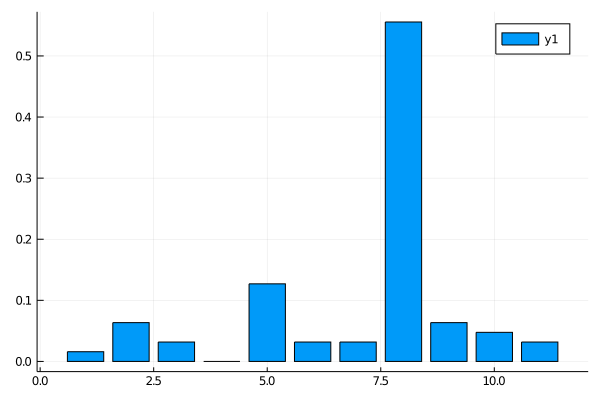

In [3]:
belief = [1, 4, 2, 0, 8, 2, 2, 35, 4, 3, 2]
belief = belief ./ sum(belief)
bar(belief)

Each position has a probability between 0 and 1, and the sum of all equals one, so this makes it a probability distribution. Each probability is discrete, so we can more precisely call this a discrete probability distribution. In practice we leave out the terms discrete and continuous unless we have a particular reason to make that distinction.

### The Mean, Median, and Mode of a Random Variable

Given a set of data we often want to know a representative or average value for that set. There are many measures for this, and the concept is called a [*measure of central tendency*](https://en.wikipedia.org/wiki/Central_tendency). For example we might want to know the *average* height of the students in a class. We all know how to find the average of a set of data, but let me belabor the point so I can introduce more formal notation and terminology. Another word for average is the *mean*. We compute the mean by summing the values and dividing by the number of values. If the heights of the students in meters is 

$$X = \{1.8, 2.0, 1.7, 1.9, 1.6\}$$

we compute the mean as

$$\mu = \frac{1.8 + 2.0 + 1.7 + 1.9 + 1.6}{5} = 1.8$$

It is traditional to use the symbol $\mu$ (mu) to denote the mean.

We can formalize this computation with the equation

$$ \mu = \frac{1}{n}\sum^n_{i=1} x_i$$


NumPy provides `numpy.mean()` for computing the mean.

In [67]:
# using Pkg
# Pkg.add("Distributions")
using Statistics
using Random
using Distributions
using Printf

In [10]:
x = [1.8, 2.0, 1.7, 1.9, 1.6]
mean(x)

1.8

The *mode* of a set of numbers is the number that occurs most often. If only one number occurs most often we say it is a *unimodal* set, and if two or more numbers occur the most with equal frequency than the set is *multimodal*. For example the set {1, 2, 2, 2, 3, 4, 4, 4} has modes 2 and 4, which is multimodal, and the set {5, 7, 7, 13} has the mode 7, and so it is unimodal. We will not be computing the mode in this manner in this book, but we do use the concepts of unimodal and multimodal in a more general sense. For example, in the **Discrete Bayes** chapter we talked about our belief in the dog's position as a *multimodal distribution* because we assigned different probabilities to different positions.

Finally, the *median* of a set of numbers is the middle point of the set so that half the values are below the median and half are above the median. Here, above and below is in relation to the set being sorted.  If the set contains an even number of values then the two middle numbers are averaged together.

Numpy provides `numpy.median()` to compute the median. As you can see the median of {1.8, 2.0, 1.7, 1.9, 1.6} is 1.8, because 1.8 is the third element of this set after being sorted. In this case the median equals the mean, but that is not generally true.

In [11]:
median(x)

1.8

## Expected Value of a Random Variable

The [*expected value*](https://en.wikipedia.org/wiki/Expected_value) of a random variable is the average value it would have if we took an infinite number of samples of it and then averaged those samples together. Let's say we have $x=[1,3,5]$ and each value is equally probable. What value would we *expect* $x$ to have, on average?

It would be the average of 1, 3, and 5, of course, which is 3. That should make sense; we would expect equal numbers of 1, 3, and 5 to occur, so $(1+3+5)/3=3$ is clearly the average of that infinite series of samples. In other words, here the expected value is the *mean* of the sample space.

Now suppose that each value has a different probability of happening. Say 1 has an 80% chance of occurring, 3 has an 15% chance, and 5 has only a 5% chance. In this case we compute the expected value by multiplying each value of $x$ by the percent chance of it occurring, and summing the result. For this case we could compute

$$\mathbb E[X] = (1)(0.8) + (3)(0.15) + (5)(0.05) = 1.5$$

Here I have introduced the notation $\mathbb E[X]$ for the expected value of $x$. Some texts use $E(x)$. The value 1.5 for $x$ makes intuitive sense because $x$ is far more likely to be 1 than 3 or 5, and 3 is more likely than 5 as well.

We can formalize this by letting $x_i$ be the $i^{th}$ value of $X$, and $p_i$ be the probability of its occurrence. This gives us

$$\mathbb E[X] = \sum_{i=1}^n p_ix_i$$

A trivial bit of algebra shows that if the probabilities are all equal, the expected value is the same as the mean:

$$\mathbb E[X] = \sum_{i=1}^n p_ix_i = \frac{1}{n}\sum_{i=1}^n x_i = \mu_x$$

If $x$ is continuous we substitute the sum for an integral, like so

$$\mathbb E[X] = \int_{a}^b\, xf(x) \,dx$$

where $f(x)$ is the probability distribution function of $x$. We won't be using this equation yet, but we will be using it in the next chapter.

We can write a bit of Python to simulate this. Here I take 1,000,000 samples and compute the expected value of the distribution we just computed analytically.

In [15]:
total = 0
N = 1_000_000
for r in rand(N)
    if r <= 0.8
        total += 1
    elseif r < 0.95
        total += 3
    else
        total +=5
    end
end

total /N

1.49998

You can see that the computed value is close to the analytically derived value. It is not exact because getting an exact values requires an infinite sample size.

### Exercise

What is the expected value of a die role?

### Solution

Each side is equally likely, so each has a probability of 1/6. Hence
$$\begin{aligned}
\mathbb E[X] &= 1/6\times1 + 1/6\times 2 + 1/6\times 3 + 1/6\times 4 + 1/6\times 5 + 1/6\times6 \\
&= 1/6(1+2+3+4+5+6)\\&= 3.5\end{aligned}$$

### Exercise

Given the uniform continuous distribution

$$f(x) = \frac{1}{b - a}$$

compute the expected value for $a=0$ and $B=20$.

### Solution
$$\begin{aligned}
\mathbb E[X] &= \int_0^{20}\, x\frac{1}{20} \,dx \\
&= \bigg[\frac{x^2}{40}\bigg]_0^{20} \\
&= 10 - 0 \\
&= 10
\end{aligned}$$

### Variance of a Random Variable

The computation above tells us the average height of the students, but it doesn't tell us everything we might want to know. For example, suppose we have three classes of students, which we label $X$, $Y$, and $Z$, with these heights:

In [17]:
X = [1.8, 2.0, 1.7, 1.9, 1.6]
Y = [2.2, 1.5, 2.3, 1.7, 1.3]
Z = [1.8, 1.8, 1.8, 1.8, 1.8]

5-element Array{Float64,1}:
 1.8
 1.8
 1.8
 1.8
 1.8

In [26]:
println("Mean of X: $(mean(X))\n", "Mean of Y: $(mean(Y))\n", "Mean of Z: $(mean(Z))")

Mean of X: 1.8
Mean of Y: 1.8
Mean of Z: 1.8


The mean of each class is 1.8 meters, but notice that there is a much greater amount of variation in the heights in the second class than in the first class, and that there is no variation at all in the third class.

The mean tells us something about the data, but not the whole story. We want to be able to specify how much *variation* there is between the heights of the students. You can imagine a number of reasons for this. Perhaps a school district needs to order 5,000 desks, and they want to be sure they buy sizes that accommodate the range of heights of the students. 

Statistics has formalized this concept of measuring variation into the notion of [*standard deviation*](https://en.wikipedia.org/wiki/Standard_deviation) and [*variance*](https://en.wikipedia.org/wiki/Variance). The equation for computing the variance is

$$\mathit{VAR}(X) = \mathbb  E[(X - \mu)^2]$$

Ignoring the square for a moment, you can see that the variance is the *expected value* for how much the sample space $X$ varies from the mean $\mu:$ ($X-\mu)$. I will explain the purpose of the squared term later. The formula for the expected value is $\mathbb E[X] = \sum\limits_{i=1}^n p_ix_i$ so we can substitute that into the equation above to get

$$\mathit{VAR}(X) = \frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2$$
 
Let's compute the variance of the three classes to see what values we get and to become familiar with this concept.

The mean of $X$ is 1.8 ($\mu_x = 1.8$) so we compute

$$ 
\begin{aligned}
\mathit{VAR}(X) &=\frac{(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2} {5} \\
&= \frac{0 + 0.04 + 0.01 + 0.01 + 0.04}{5} \\
\mathit{VAR}(X)&= 0.02 \, m^2
\end{aligned}$$

NumPy provides the function `var()` to compute the variance:

In [27]:
println("$(var(X)) meters squared")

0.024999999999999988 meters squared


This is perhaps a bit hard to interpret. Heights are in meters, yet the variance is meters squared. Thus we have a more commonly used measure, the *standard deviation*, which is defined as the square root of the variance:

$$\sigma = \sqrt{\mathit{VAR}(X)}=\sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

It is typical to use $\sigma$ for the *standard deviation* and $\sigma^2$ for the *variance*. In most of this book I will be using $\sigma^2$ instead of $\mathit{VAR}(X)$ for the variance; they symbolize the same thing.

For the first class we compute the standard deviation with

$$ 
\begin{aligned}
\sigma_x &=\sqrt{\frac{(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2} {5}} \\
&= \sqrt{\frac{0 + 0.04 + 0.01 + 0.01 + 0.04}{5}} \\
\sigma_x&= 0.1414
\end{aligned}$$

We can verify this computation with the NumPy method `numpy.std()` which computes the standard deviation. 'std' is a common abbreviation for standard deviation.

In [31]:
println("std: $(std(X, corrected=false))")
println("var: $(std(X,corrected=false)^2)")

std: 0.14142135623730948
var: 0.019999999999999993


And, of course, $0.1414^2 = 0.02$, which agrees with our earlier computation of the variance.

What does the standard deviation signify? It tells us how much the heights vary amongst themselves. "How much" is not a mathematical term. We will be able to define it much more precisely once we introduce the concept of a Gaussian in the next section. For now I'll say that for many things 68% of all values lie within one standard deviation of the mean. In other words we can conclude that for a random class 68% of the students will have heights between 1.66 (1.8-0.1414) meters and 1.94 (1.8+0.1414) meters. 

We can view this in a plot:

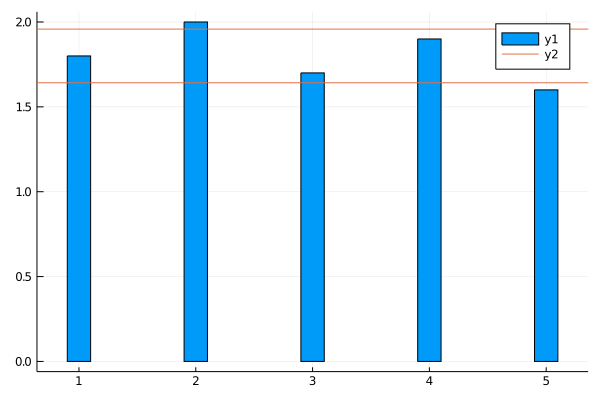

In [60]:
bar(X, bar_width=0.2)
hline!([mean(X)+std(X), mean(X) - std(X)])


For only 5 students we obviously will not get exactly 68% within one standard deviation. We do see that 3 out of 5 students are within $\pm1\sigma$, or 60%, which is as close as you can get to 68% with only 5 samples. Let's look at the results for a class with 100 students.

>  We write one standard deviation as  $1\sigma$, which is pronounced "one standard deviation", not "one sigma". Two standard deviations is $2\sigma$, and so on.

Mean = 1.8075685142286126
std = 0.138140244652788


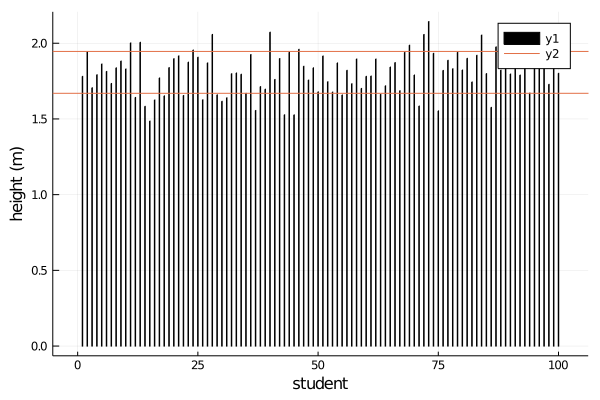

In [74]:
data = 1.8 .+ randn(100).*0.1414
μ,σ = mean(data), std(data)

println("Mean = $μ")
println("std = $σ")

bar(data,bar_width=0.1, color=:black, ylabel="height (m)", xlabel="student")
hline!([μ + σ, μ - σ])

By eye roughly 68% of the heights lie within $\pm1\sigma$ of the mean 1.8, but we can verify this with code.

In [87]:
100*sum(μ - σ .< data .< μ + σ)/length(data)

68.0

We'll discuss this in greater depth soon. For now let's compute the standard deviation for 

$$Y = [2.2, 1.5, 2.3, 1.7, 1.3]$$

The mean of $Y$ is $\mu=1.8$ m, so 

$$ 
\begin{aligned}
\sigma_y &=\sqrt{\frac{(2.2-1.8)^2 + (1.5-1.8)^2 + (2.3-1.8)^2 + (1.7-1.8)^2 + (1.3-1.8)^2} {5}} \\
&= \sqrt{0.152} = 0.39 \ m
\end{aligned}$$

We will verify that with NumPy with